In [1]:
class Pre_Process(object):
    def __init__(self):
        import glob
        x=glob.glob('*.hea')
        import csv
        import os
        from sys import argv
        
        strings=[]
        integer=[]
        j=1
        
            
        for i in range(len(x)):
            integer=[]
            dst ="100" + str(j) + ".txt"
            os.rename(x[i],dst)

            f=open(dst)
            lines=f.readlines()
            f.close()

            f=open(dst,'w')

            for line in lines:
                f.write(line[1:])                
            f.close()

            fin=open(dst,"r")
            data_list=fin.readlines()
            fin.close()

                #print(data_list)
            del data_list[0:5]
                #print(data_list)
            fout=open(dst,"w")
            fout.writelines(data_list)
            fout.close()

            f= open(dst,"r")
            lines=f.readlines()
            output=[]
            mrinal="--"
            for line in lines:
                if not line.startswith(mrinal):
                    output.append(line)
                    f.close()

                    #print(output)

                fout=open(dst,"w")
                fout.writelines(output)
                fout.close()

            f=open(dst,"r")
            lines=f.readlines()
            f.close()
            for line in lines:
                if len(line.split())==2:
                    strings.append(line.split()[0])
                    integer.append(''.join(line.split()[1:]))

                else:
                    dab=line.split()[:2]
                    integer.append(''.join(line.split()[2:]))

                    s=" "
                    s=s.join(dab)
                    strings.append(s)

            integer=[float(i) for i in integer]

            if j==1:
                with open("data.csv","a") as f:
                    writer=csv.writer(f)
                    writer.writerow(strings)
            f.close()

            with open("data.csv","a") as f:
                writer=csv.writer(f)
                writer.writerow(integer)
            f.close()
            j+=1
            
    def pre_again(self):
        
        import numpy as np
        import pandas as pd
        
        dataset=pd.read_csv("data.csv").fillna(0).astype(np.float32)
        data=dataset[['pH','BDecf','pCO2','BE','Apgar1','Apgar5']]
        x=np.array(data)
        normal=[]
        distress=[]
        xyz=[]
        j=0
        for i in x:
            if i[0]>=7.18 and i[0]<=7.38 and i[2]>=4.9 and i[2]<=10.7 and i[4]>=6:
                normal.append(i)
                xyz.append(1)     
            else:
                distress.append(i)
                xyz.append(0)
        dataset['result']=xyz
        print(len(normal))
        print(len(distress))
        dataset=dataset.drop(['pH','BDecf','pCO2','BE','Apgar1','Apgar5','dbID','Rec. type','Pos. II.st.','Sig2Birth','Sex','NICU days','Seizures','HIE','Intubation','Main diag.','Other diag.'], axis=1)
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0,1)) 
        scaled_values = scaler.fit_transform(dataset) 
        dataset.loc[:,:] = scaled_values
        print(dataset.head())
        type(dataset)
        
        return dataset

In [2]:
ob1=Pre_Process()



In [3]:
data=ob1.pre_again()

339
212
   Gest. weeks  Weight(g)       Age  Gravidity  Parity  Diabetes  \
0     0.000000   0.560000  0.500000   0.090909     0.0       1.0   
1     0.666667   0.610526  0.178571   0.090909     0.0       0.0   
2     0.500000   0.793684  0.464286   0.090909     0.0       0.0   
3     0.666667   0.709474  0.642857   0.090909     0.0       0.0   
4     0.666667   0.747368  0.357143   0.090909     0.0       0.0   

   Hypertension  Preeclampsia  Liq. praecox  Pyrexia  Meconium  Presentation  \
0           0.0           0.0           1.0      0.0       0.0      0.666667   
1           0.0           0.0           0.0      0.0       1.0      0.333333   
2           0.0           0.0           1.0      0.0       0.0      0.333333   
3           0.0           0.0           0.0      0.0       1.0      0.333333   
4           0.0           0.0           0.0      0.0       0.0      0.333333   

   Induced   I.stage  NoProgress  CK/KP  II.stage  Deliv. type  result  
0      0.0  0.000666         

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [35]:
class classifier(Pre_Process):
    def split(self,class_pre_process):
        self.dataset=class_pre_process
        from sklearn.model_selection import train_test_split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.dataset.drop(['result'],axis='columns'),self.dataset.result,test_size=0.2)
        self.y_train.shape
        self.y_test.shape
        
    def pie(self,x,y):
        import matplotlib.pyplot as plt
        self.x=x
        self.y=y
        labels='correct','wrong'
        sizes=[x,y]
        colors=['green','red']
        explode=(0,0.15)
        plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%0.2f%%', shadow=True, startangle=140)
        plt.axis('equal')
        plt.show()

    def confusion(self,test,predict):
        from sklearn.metrics import confusion_matrix
        cm=confusion_matrix(test,predict)
        x=cm[0][0]+cm[1][1]
        y=cm[0][1]+cm[1][0]
        print('{} : correct values, {} : wrong values'.format(x,y))
        print('Total Predicted values : ',len(predict))
        self.pie(x,y)
        
    def Random_Forest(self):        
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.model_selection import cross_val_score
        import time
        y=[]
        i=1
        while(i<100):
            model=RandomForestClassifier(n_estimators=i)
            model.fit(self.X_train,self.y_train)
            y.append(model.score(self.X_test,self.y_test))
            i+=1
        print('Max accuracy : ',max(y)*100)
        print(y.index(max(y)))
        
        model.score(self.X_test,self.y_test)
        y_predict=model.predict(self.X_test)
        from sklearn.metrics import confusion_matrix
        cm=confusion_matrix(self.y_test,y_predict)
        print(cm)
        self.confusion(self.y_test,y_predict)
    
   
    def Gradient_Boosting(self):   
        from sklearn.ensemble import GradientBoostingClassifier
        let=[]
        i=1
        while(i<=200):
            model=GradientBoostingClassifier(n_estimators=i,learning_rate=.05)
            model.fit(self.X_train,self.y_train)
            let.append(model.score(self.X_test,self.y_test))
            i+=1

        max(let)
        model.score(self.X_test,self.y_test)
        y_predict=model.predict(self.X_test)
        y_predict
        from sklearn.metrics import confusion_matrix
        cm=confusion_matrix(self.y_test,y_predict)
        cm
        self.confusion(self.y_test,y_predict)
        
        
    def Support_Vector_Machine(self): 
        import numpy as np
        from sklearn import svm
        kernels=('linear','poly','rbf','sigmoid')
        for kernel in kernels:
            model=svm.SVC(kernel=kernel)
            model.fit(self.X_train,self.y_train)
            accuracy=model.score(self.X_test,self.y_test)
            print('Accuracy with kernel:',kernel,'is:',accuracy*100)
            self.pie(accuracy*100,100-(accuracy*100))
                

In [36]:
lol=classifier()

Max accuracy :  64.86486486486487
8
[[ 7 37]
 [10 57]]
64 : correct values, 47 : wrong values
Total Predicted values :  111


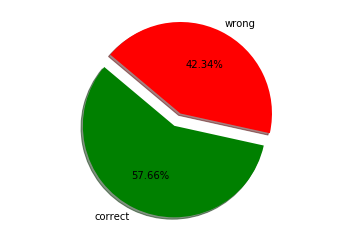

In [37]:
lol.split(data)
lol.Random_Forest()

57 : correct values, 54 : wrong values
Total Predicted values :  111


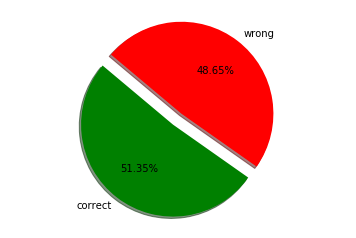

In [38]:
lol.split(data)
lol.Gradient_Boosting()

Accuracy with kernel: linear is: 63.06306306306306


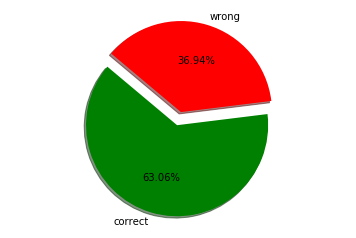

Accuracy with kernel: poly is: 65.76576576576578


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


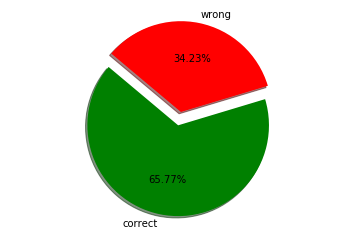

Accuracy with kernel: rbf is: 64.86486486486487


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


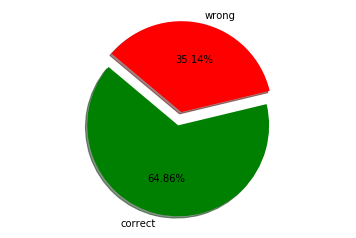

Accuracy with kernel: sigmoid is: 65.76576576576578


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


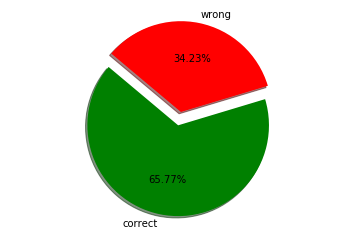

In [39]:
lol.split(data)
lol.Support_Vector_Machine()

In [ ]:
lol.y_train.shape

In [ ]:
y_test.shape

# Random Forest Classifier

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
x=cm[0][0]+cm[1][1]
y=cm[0][1]+cm[1][0]
print('{} : correct values, {} : wrong values'.format(x,y))
print('Total Predicted values : ',len(y_predict))

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
let=[]
i=1
while(i<=200):
    model=GradientBoostingClassifier(n_estimators=i,learning_rate=.05)
    model.fit(X_train,y_train)
    let.append(model.score(X_test,y_test))
    i+=1
    
max(let)

model.score(X_test,y_test)
y_predict=model.predict(X_test)
y_predict
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
x=cm[0][0]+cm[1][1]
y=cm[0][1]+cm[1][0]
print('{} : correct values, {} : wrong values'.format(x,y))
print('Total Predicted values : ',len(y_predict))

import matplotlib.pyplot as plt
labels='correct','wrong'
sizes=[x,y]
colors=['green','red']
explode=(0,0.15)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%0.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# Support Vector Machine

In [ ]:
import numpy as np
from sklearn import svm

def evaluate_on_test_data(model=None):
    predictions=model.predict(X_test)
    corr_classifications=0
    #for i in range(len(y_test)):
        #  if predictions[i]==y_test[i]:
     #       corr_classifications+=1
    #accuracy=100*corr_classifications/len(y_test)
    accuracy=model.score(X_test,y_test)
    print(type(predictions))
    return accuracy

kernels=('linear','poly','rbf','sigmoid')
for kernel in kernels:
    model=svm.SVC(kernel=kernel)
    model.fit(X_train,y_train)
    acc=evaluate_on_test_data(model)
    print('Accuracy with kernel:',kernel,'is:',acc*100)
